In [1]:
#include <fstream>
#include <cstdlib>
#include <utility> 

In [2]:
gROOT->ProcessLine(".x Lib.C");

(int) 0


In [3]:
/*Debe de ir en Lib.C*/
std::string ReplaceAll(std::string str, const std::string& from, const std::string& to) {
    size_t start_pos = 0;
    while((start_pos = str.find(from, start_pos)) != std::string::npos) {
        str.replace(start_pos, from.length(), to);
        start_pos += to.length(); // Handles case where 'to' is a substring of 'from'
    }
    return str;
}

In [4]:
/*Debe de ir en Lib.C*/
std::string NameMaker(std::string str){
    std::string strout =  str;
    strout = ReplaceAll(strout, std::string(" "), std::string("_"));
    strout = ReplaceAll(strout, std::string("<"), std::string("LT"));
    strout = ReplaceAll(strout, std::string(">"), std::string("MT"));
    strout = ReplaceAll(strout, std::string("#"), std::string(""));
    strout = ReplaceAll(strout, std::string("@"), std::string(""));
    strout = ReplaceAll(strout, std::string("("), std::string(""));
    strout = ReplaceAll(strout, std::string(")"), std::string(""));
    strout = ReplaceAll(strout, std::string("||"), std::string("OR"));
    strout = ReplaceAll(strout, std::string("&&"), std::string("AND"));
    strout = ReplaceAll(strout, std::string("."), std::string(""));
    strout = ReplaceAll(strout, std::string("=="), std::string("EQ"));
    strout = ReplaceAll(strout, std::string("!="), std::string("NEQ"));
    //strout = ReplaceAll(strout, std::string("||"), std::string("OR"));
    //strout = ReplaceAll(strout, std::string("||"), std::string("OR"));


    return strout;
}

In [5]:
/*Variables names*/
//std::pair <std::string,std::string> Variable ("NameVariable","Latex Labl #"); 
std::pair <std::string,std::string> Var1 ("MT_LeadingMuon_MET","MT(#mu,MET) [GeV]"); 
/*
std::string Var1="MT_LeadingMuon_MET";
std::string Var2="AnaMuons.Pt()";
std::string Var4="@AnaJets.size()";
std::string Var5="AnaMET.Mt()";
std::string Var6="@AnaMuons.size()";
*/

In [6]:
/*Plotter Objets definition, one per variable*/
Harry::Plotter *Plotter1 = new Harry::Plotter("demo/VLFTree",{Var1.first},20,0,100);
//p.SetVerbose(true);

In [7]:
/*Plotter Objets Vector, to the filling procedure*/
std::vector<Harry::Plotter *> PlotVec;
PlotVec.push_back(Plotter1);

In [8]:
/*Filling the Plotter objets*/
for(auto p: PlotVec) {
    p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/Signal.root","Signal",0.33100);
//DY
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/DYJetsToLL_HT/DYJetsToLL_M-50.root","DY",3.40390);
//Single Top
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_s-channel_4f_leptonDecays.root","ST",0.336);//30
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_t-channel_antitop_4f_inclusiveDecays.root","ST",0.2658808098);//30
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_t-channel_top_4f_inclusiveDecays.root","ST",0.2658808098);//45
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_tW_antitop_5f_inclusiveDecays.root","ST",0.2743065568);//120
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/ST/ST_tW_top_5f_inclusiveDecays.root","ST",0.2743065568);
//TT
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/TTToLL_MLL/TT_TuneCUETP8M2T4.root","TT",1.07907048);
//W+Jets
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-70To100.root","WPlusJets",163.713);//max20000
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-100To200.root","WPlusJets",16.12246515);//max 160000
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-200To400.root","WPlusJets",0.5484566297);//4000
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-400To600.root","WPlusJets",0.1491425684);//200
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-600To800.root","WPlusJets",0.1879002812);
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-800To1200.root","WPlusJets",0.03561855317);
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-1200To2500.root","WPlusJets",0.02339910957);
p->AddDirectory("/home/camilo/cms/VLF_Montecarlo_Ana/Data/WJets_HT/WJetsToLNu_HT-2500ToInf.root","WPlusJets",0.001475217613); //max
    
}

In [9]:
/*Canvas Objet*/
TCanvas c;

In [10]:
/*Map containing the number of even after each cut*/
std::map<std::string, std::map<std::string, Double_t> > CutFlow;
//Map to count events
std::map<std::string, Double_t> temp;

In [11]:
/*Cut Definition*/
std::string cut0 = "@AnaMuons.size()==1&&@BJets.size()==0&&AnaMuons.pt()>3";
std::string cut1 = cut0+"&&MT_TheMuon_MET<60";
std::string cut2 = cut1+"&&AnaMuons.pt()<25";
std::string cut3 = cut2+"&&@AnaJets.size()<4";

In [12]:
/*Folder name, if you want to save the plots*/
std::string SetCutName = NameMaker(cut3);
std::string PlotPath = "Plots_PDF/"+SetCutName;
//Bool_t SaveFiles = kTRUE;
Bool_t SaveFiles = kFALSE;

In [13]:
//std::cout<<SetCutName;

In [14]:
/*Create the output Folder (If is needed)*/
if (SaveFiles){
    std::string cmdbash = "mkdir -p "+PlotPath;
    const int dir_err =system(cmdbash.c_str());
}

## FIRST CUT

In [15]:
//Used for cross check
Plotter1->SetCut(cut0.c_str());

In [16]:
/*Get the stack Plots from the Plotter objet*/
auto Plotter1_hplots = Plotter1->GetPlots();

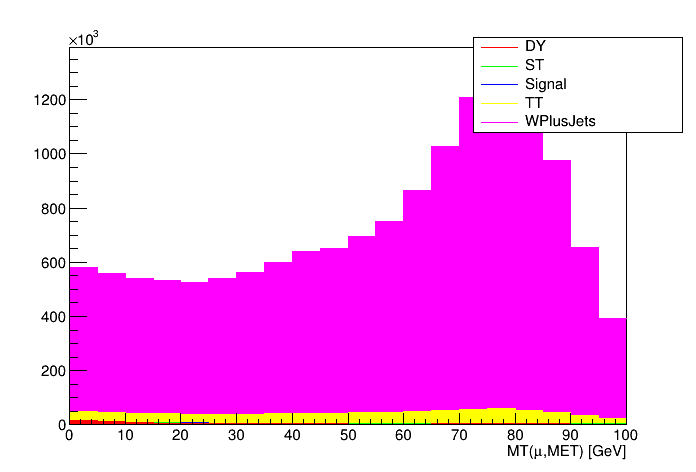

In [17]:
/*Plotting the HStack*/
Plotter1_hplots[Var1.first].first->Draw("Histo"); //HStack object
Plotter1_hplots[Var1.first].first->GetXaxis()->SetTitle(Var1.second.c_str());
Plotter1_hplots[Var1.first].first->GetYaxis()->SetTitle("");
Plotter1_hplots[Var1.first].first->SetTitle("");
Plotter1_hplots[Var1.first].second->Draw(); //Legend object
c.Draw();

In [18]:
/*Saving the plot*/
PlotName = NameMaker(Var1.first);
PlotPathName = PlotPath + "/" + PlotName + "_Stack.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

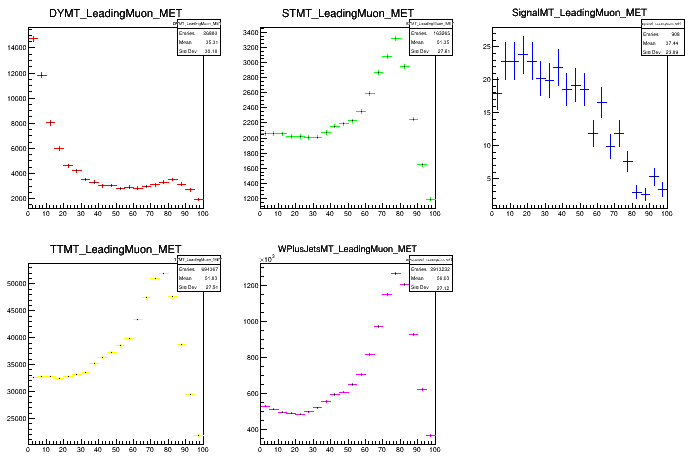

In [19]:
Plotter1_hplots[Var1.first].first->Draw("PADS,histo"); //HStack object "PADS" "nostack,e1p"
Plotter1_hplots[Var1.first].second->Draw(); //Legend object
c.Draw();

In [20]:
/*Saving the plot*/
PlotPathName = PlotPath + "/" + PlotName + "_AllPads.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

In [21]:
gPad->SetLogy(1);

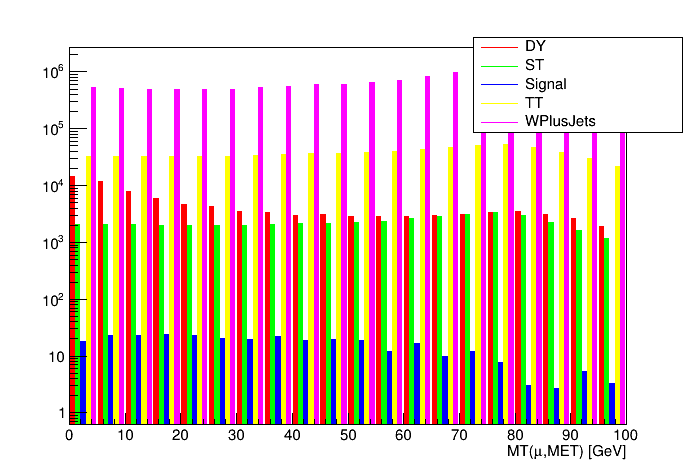

In [22]:
Plotter1_hplots[Var1.first].first->Draw("Histo,nostackb"); //HStack object "PADS" "nostack,e1p"
Plotter1_hplots[Var1.first].first->GetXaxis()->SetTitle(Var1.second.c_str());
Plotter1_hplots[Var1.first].first->GetYaxis()->SetTitle("");
Plotter1_hplots[Var1.first].first->SetTitle("");
Plotter1_hplots[Var1.first].second->Draw(); //Legend object
c.Draw();

In [23]:
/*Saving the plot*/
PlotPathName = PlotPath + "/" + PlotName + "_All.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

In [24]:
gPad->SetLogy(0)

## Significance

### Significance Less Than

In [25]:
/*Get the histograms from the Plotter Objet*/
auto Plotter1_Hist=Plotter1->GetHists();

In [26]:
//Vector of the TH1D Background, as
std::vector<TH1D *> BackgroundPlotter1;
BackgroundPlotter1.push_back((TH1D *)Plotter1_Hist[Var1.first].first.at(0));
BackgroundPlotter1.push_back((TH1D *)Plotter1_Hist[Var1.first].first.at(1));
BackgroundPlotter1.push_back((TH1D *)Plotter1_Hist[Var1.first].first.at(3));
BackgroundPlotter1.push_back((TH1D *)Plotter1_Hist[Var1.first].first.at(4));

In [27]:
temp["DY"]=Plotter1_Hist[Var1.first].first.at(0)->Integral();
temp["ST"]=Plotter1_Hist[Var1.first].first.at(1)->Integral();
temp["TT"]=Plotter1_Hist[Var1.first].first.at(3)->Integral();
temp["WJ"]=Plotter1_Hist[Var1.first].first.at(4)->Integral();
temp["Signal"]=Plotter1_Hist[Var1.first].first.at(2)->Integral();

In [28]:
CutFlow["Cut0"]=temp;

In [29]:
//temp["TT"]
//CutFlow["Cut0"]

In [30]:
Significance Plotter1_Sig((TH1D *)Plotter1_Hist[Var1.first].first.at(2),BackgroundPlotter1);
TH1D * Plotter1_SigLT=Plotter1_Sig.GetSigLessThan();

Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created


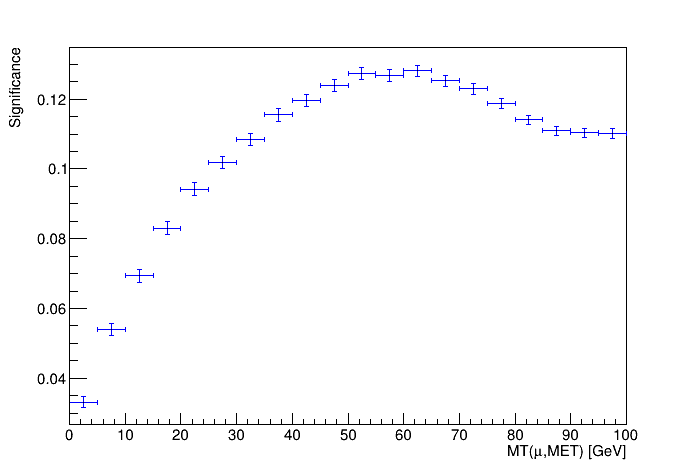

In [31]:
Plotter1_SigLT->Draw("E1");
Plotter1_SigLT->SetTitle("");
Plotter1_SigLT->GetXaxis()->SetTitle(Var1.second.c_str());
Plotter1_SigLT->GetYaxis()->SetTitle("Significance");
c.Draw();

In [32]:
PlotPathName = PlotPath + "/" + PlotName + "_SigLT.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

### Significance More Than

In [33]:
auto Plotter1_SigMT=Plotter1_Sig.GetSigMoreThan();

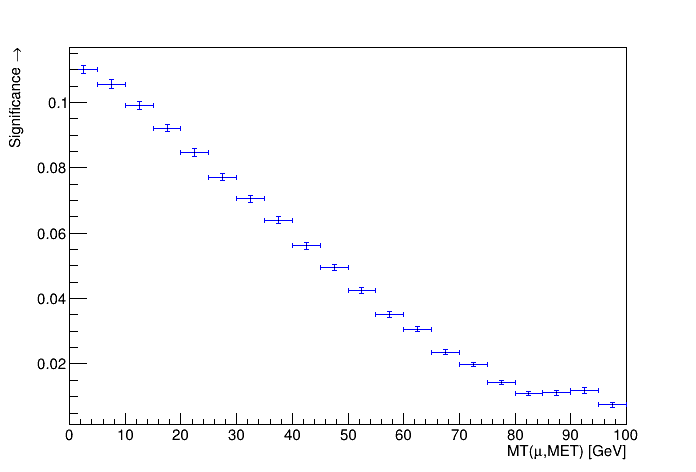

In [57]:
Plotter1_SigMT->Draw("E1");
Plotter1_SigMT->SetTitle("");
Plotter1_SigMT->GetXaxis()->SetTitle(Var1.second.c_str());
Plotter1_SigMT->GetYaxis()->SetTitle("Significance");
c.Draw();

In [35]:
PlotPathName = PlotPath + "/" + PlotName + "_SigMT.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

### Significance 

In [36]:
auto GeneralSigPlotter1 = Plotter1_Sig.GetSignificance();

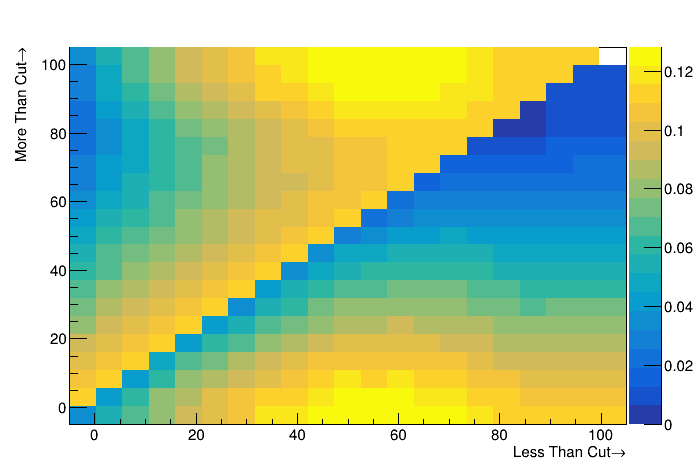

In [64]:
GeneralSigPlotter1->Draw("COLZ1");
//GeneralSigPlotter1->Draw("text, same");
GeneralSigPlotter1->SetTitle("");
GeneralSigPlotter1->GetYaxis()->SetTitle("More Than Cut#rightarrow");
GeneralSigPlotter1->GetXaxis()->SetTitle("Less Than Cut#rightarrow");
//TLatex t(3,10,"#xrightarrow{Less Than Cut}");
//t.Draw();

c.Draw();

In [39]:
PlotPathName = PlotPath + "/" + PlotName + "_SigGeneral.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

### efficency plots

In [40]:
gStyle->SetOptStat(0);

In [41]:
//Get The efficency plots
std::vector<TH1D *> Plotter1_EffLT = Plotter1_Sig.GetEffLessThan();

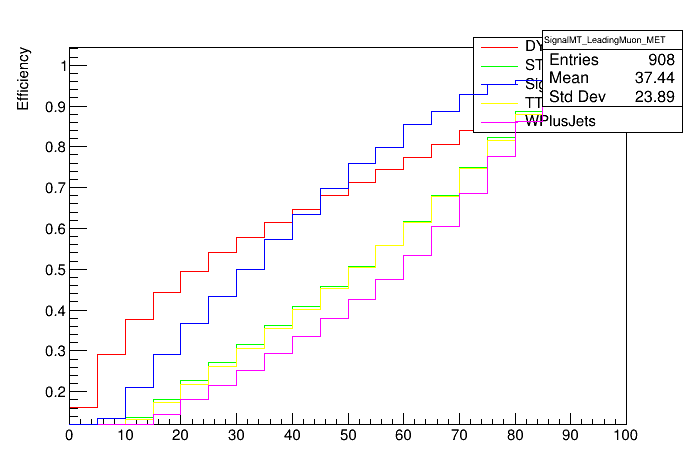

In [42]:
//Plotter1_EffLT[0]->SetFillStyle(4050);
Plotter1_EffLT[0]->SetFillColor(0);
Plotter1_EffLT[0]->Draw("E");
Plotter1_EffLT[0]->SetTitle("");
Plotter1_EffLT[0]->GetXaxis()->SetTitle();
Plotter1_EffLT[0]->GetYaxis()->SetTitle("Efficiency");
Plotter1_hplots[Var1.first].second->Draw(); //Legend object
//Plotter1_EffLT[1]->SetFillStyle(4050);
Plotter1_EffLT[1]->SetFillColor(0);
Plotter1_EffLT[1]->Draw("same E");
//Plotter1_EffLT[2]->SetFillStyle(4050);
Plotter1_EffLT[2]->SetFillColor(0);
Plotter1_EffLT[2]->Draw("same E");
//Plotter1_EffLT[3]->SetFillStyle(4050);
Plotter1_EffLT[3]->SetFillColor(0);
Plotter1_EffLT[3]->Draw("same E");
//Plotter1_EffLT[4]->SetFillStyle(4050);
Plotter1_EffLT[4]->SetFillColor(0);
Plotter1_EffLT[4]->Draw("same E");
c.Draw();

In [43]:
PlotPathName = PlotPath + "/" + PlotName + "LTEff.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

### Efficiency More Than

In [44]:
//Get The efficency plots
std::vector<TH1D *> Plotter1_EffMT = Plotter1_Sig.GetEffMoreThan();

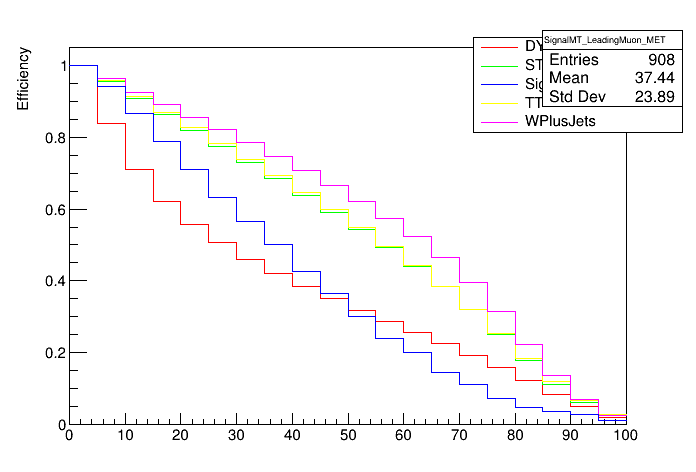

In [45]:
//Plotter1_EffMT[0]->SetFillStyle(4050);
Plotter1_EffMT[0]->SetFillColor(0);
Plotter1_EffMT[0]->Draw("E");
Plotter1_EffMT[0]->SetTitle("");
Plotter1_EffMT[0]->GetXaxis()->SetTitle();
Plotter1_EffMT[0]->GetYaxis()->SetTitle("Efficiency");
Plotter1_hplots[Var1.first].second->Draw(); //Legend object
//Plotter1_EffMT[1]->SetFillStyle(4050);
Plotter1_EffMT[1]->SetFillColor(0);
Plotter1_EffMT[1]->Draw("same E");
//Plotter1_EffMT[2]->SetFillStyle(4050);
Plotter1_EffMT[2]->SetFillColor(0);
Plotter1_EffMT[2]->Draw("same E");
//Plotter1_EffMT[3]->SetFillStyle(4050);
Plotter1_EffMT[3]->SetFillColor(0);
Plotter1_EffMT[3]->Draw("same E");
//Plotter1_EffMT[4]->SetFillStyle(4050);
Plotter1_EffMT[4]->SetFillColor(0);
Plotter1_EffMT[4]->Draw("same E");
c.Draw();

In [46]:
PlotPathName = PlotPath + "/" + PlotName + "MTEff.pdf";
if (SaveFiles) c.SaveAs(PlotPathName.c_str(),"pdf");

### Sis

In [47]:
// Create a map iterator and point to beginning of map
std::string DataFileName = PlotPath + "/" + PlotName +"_Cutflow.dat";
if (SaveFiles) ofstream myfile (FileName.c_str());
std::map<std::string, std::map<std::string, Double_t> >::iterator it = CutFlow.begin();
 
// Iterate over the map using Iterator till end.
while (it != CutFlow.end())
{
    // Accessing KEY from element pointed by it.
    std::string Cut = it->first;
    std::cout<< "-------------------------------" <<std::endl;
    std::cout<< "-----------" <<Cut << "----------------" <<std::endl;
    std::cout<< "-------------------------------" <<std::endl;
    //File
    if (SaveFiles) myfile<< "-------------------------------" <<std::endl;
    if (SaveFiles) myfile<< "-----------" <<Cut << "----------------" <<std::endl;
    if (SaveFiles) myfile<< "-------------------------------" <<std::endl;
    
    

    // Accessing VALUE from element pointed by it.
    std::map<std::string, Double_t> map2 = it->second;
    
    // Create a map iterator and point to beginning of map
    std::map<std::string, Double_t>::iterator other = map2.begin();
    while (other != map2.end())
    {
        // Accessing KEY from element pointed by other.
        std::string sig = other->first;
        // Accessing VALUE from element pointed by it.
        int count = other->second;
        std::cout << "        " <<other->first << " ...... " << count <<std::endl;
        if (SaveFiles) myfile << "        " <<other->first << " ...... " << count <<std::endl;
        // Increment the Iterator to point to next entry
        other++;
            
    }
    // Increment the Iterator to point to next entry
    it++;
}
if (SaveFiles) myfile.close();

-------------------------------
-----------Cut0----------------
-------------------------------
        DY ...... 182994
        ST ...... 90259
        Signal ...... 601
        TT ...... 1497820
        WJ ...... 28010129
